<a href="https://colab.research.google.com/github/Avinomaria/DSA_ICTAK_QandA/blob/main/week11__activity_students_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

** **bold text**Answer: ** 

In [145]:
#This is a Classification Problem since the target for prediction (i.e. passed) has 2 catagorical values, 'yes' or 'no'


### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [146]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [147]:
# Read student data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving student-data.csv to student-data (3).csv
User uploaded file "student-data.csv" with length 40294 bytes


In [149]:
data =  pd.read_csv('student-data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


# New Section

### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [150]:
# Calculate number of students
n_students = data.shape[0]


In [151]:
# Calculate number of features
n_features = data.shape[1]


In [152]:
# Calculate passing students
n_passed = data.passed.value_counts().yes


In [153]:
# Calculate failing students
n_failed = data.passed.value_counts().no

In [154]:
# Calculate graduation rate
grad_rate = round((n_passed/n_students)*100,2)


In [155]:
# Print the results
print('The total number of students : ',n_students)
print('The number of features for each student : ',n_features)
print('The numbers of students passed : ',n_passed)
print('The number of students failed : ',n_failed)
print('The graduation rate of the class : ',grad_rate,'%')


The total number of students :  395
The number of features for each student :  31
The numbers of students passed :  265
The number of students failed :  130
The graduation rate of the class :  67.09 %


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [156]:
# Extract feature columns

In [157]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [158]:
X = data.drop(['school','address','passed'],axis=1)

In [159]:
# Extract target column 'passed'

In [160]:
y = data['passed']

In [161]:
# Separate the data into feature data and target data (X and y, respectively)

In [162]:
X.head()


,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,F,18,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6
1,F,17,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4
2,F,15,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10
3,F,15,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2
4,F,16,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4


In [163]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   famsize     395 non-null    object
 3   Pstatus     395 non-null    object
 4   Medu        395 non-null    int64 
 5   Fedu        395 non-null    int64 
 6   Mjob        395 non-null    object
 7   Fjob        395 non-null    object
 8   reason      395 non-null    object
 9   guardian    395 non-null    object
 10  traveltime  395 non-null    int64 
 11  studytime   395 non-null    int64 
 12  failures    395 non-null    int64 
 13  schoolsup   395 non-null    object
 14  famsup      395 non-null    object
 15  paid        395 non-null    object
 16  activities  395 non-null    object
 17  nursery     395 non-null    object
 18  higher      395 non-null    object
 19  internet    395 non-null    object
 20  romantic  

In [164]:
X.shape

(395, 28)

In [165]:
y.head()

0     no
1     no
2    yes
3    yes
4    yes
Name: passed, dtype: object

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [166]:
df = pd.get_dummies(data)
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,passed_no,passed_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1
3,15,4,2,1,3,0,3,2,2,1,1,5,2,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1


In [167]:
df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'passed_no', 'passed_yes'],
      dtype='object')

In [168]:
X=pd.DataFrame(df)
X.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,passed_no,passed_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1
3,15,4,2,1,3,0,3,2,2,1,1,5,2,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1


### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [169]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=42,test_size=.24)


In [170]:
# Show the results of the split
X_train.shape



(300, 58)

In [171]:
y_train.shape

(300,)

In [173]:
X_test.shape

(95, 58)

In [174]:
y_test.shape

(95,)

Number of samples in training set is 300 and in test set is 95

### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

**Logistic Regression**
**K Nearest Neighbors**
**Random Forest**

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

In [175]:
#Logistic regression is easier to implement
# KNN  provides fast calculations and simple algorithm
# Random Forest is suitable for large dataset and has high prediction power


In [176]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


Scaling Data

In [177]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)



In [178]:
# fit model-1  on traning data 
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)



LogisticRegression()

In [179]:
# predict on the test data 

In [180]:
y_pred = logit_model.predict(X_test)

In [181]:
# calculate the accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


In [182]:
print('Accuracy is  :',accuracy_score(y_test,y_pred))

Accuracy is  : 1.0


In [183]:
print('Confusion Matrix = \n', confusion_matrix(y_test, y_pred))

Confusion Matrix = 
 [[35  0]
 [ 0 60]]


In [184]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy
acc_values = []
neighbors = np.arange(3,15)

In [185]:
for k in neighbors:
    classifier =KNeighborsClassifier(n_neighbors =k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [186]:
acc_values

[0.8105263157894737,
 0.8631578947368421,
 0.8526315789473684,
 0.8526315789473684,
 0.8210526315789474,
 0.8631578947368421,
 0.8315789473684211,
 0.8947368421052632,
 0.8210526315789474,
 0.8631578947368421,
 0.8105263157894737,
 0.8736842105263158]

Text(0, 0.5, 'accuracy')

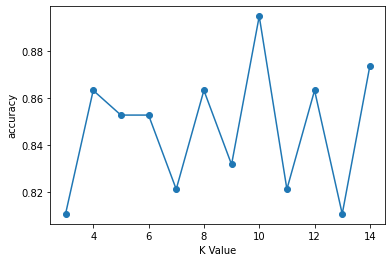

In [187]:
# check for which k value , we get highest accuracy
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K Value')
plt.ylabel('accuracy')

In [188]:
classifier =KNeighborsClassifier(n_neighbors = 10, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [189]:
print('Accuracy is : ',accuracy_score(y_test,y_pred))

Accuracy is :  0.8947368421052632


In [190]:
print('Confusion Matrix = \n', confusion_matrix(y_test, y_pred))

Confusion Matrix = 
 [[27  8]
 [ 2 58]]


In [191]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

In [192]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [193]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [194]:
print('Confusion Matrix = \n', confusion_matrix(y_test, y_pred))

Confusion Matrix = 
 [[35  0]
 [ 0 60]]
